In [6]:
%load_ext autoreload
%autoreload 2
import pyscheduling_cc.SMSP.wiCi as smsp
import pyscheduling_cc.SMSP.riwiCi as smsp_ri
import pyscheduling_cc.SMSP.wiTi as smsp_T
import pyscheduling_cc.SMSP.riwiTi as smsp_riT

In [8]:
instance = smsp.wiCi_Instance.generate_random(20,Wmax=10)
instance.to_txt("deleteMe.txt")
solution = smsp.Heuristics.WSPT(instance)
print(solution)

Search stopped with status : OPTIMAL
 Solution is : 
 Objective : 8214
Job_schedule (job_id , start_time , completion_time) | objective
(2, 0, 1) : (5, 1, 7) : (13, 7, 13) : (3, 13, 18) : (6, 18, 26) : (19, 26, 31) : (12, 31, 37) : (0, 37, 49) : (9, 49, 63) : (11, 63, 79) : (17, 79, 97) : (16, 97, 113) : (7, 113, 132) : (1, 132, 151) : (15, 151, 158) : (14, 158, 176) : (10, 176, 192) : (8, 192, 210) : (4, 210, 221) : (18, 221, 238) | 8214 
Runtime is : 9.090000000355758e-05s 
time to best is : -1s 



In [9]:
number_of_trials = 100
heuristic_1_score = 0
heuristic_2_score = 0
for _ in range(number_of_trials):
    instance = smsp_ri.riwiCi_Instance.generate_random(50,Wmax=10,Pmin=50)
    objective_value_1 = smsp_ri.Heuristics.WSECi(instance).best_solution.objective_value
    objective_value_2 = smsp_ri.Heuristics.WSAPT(instance).best_solution.objective_value
    if objective_value_1<objective_value_2:
        heuristic_1_score += 1
    elif objective_value_2<objective_value_1:
        heuristic_2_score += 1
    else:
        heuristic_1_score += 1
        heuristic_2_score += 1
print("Heuristic 1 gives the best solution in ",float(heuristic_1_score/number_of_trials)," of the instances")
print("Heuristic 2 gives the best solution in ",float(heuristic_2_score/number_of_trials)," of the instances")

Heuristic 1 gives the best solution in  0.71  of the instances
Heuristic 2 gives the best solution in  0.48  of the instances


Objective : 309611
Job_schedule (job_id , start_time , completion_time) | objective
(16, 20, 23) : (21, 31, 35) : (27, 55, 56) : (22, 65, 68) : (6, 73, 80) : (33, 80, 85) : (30, 85, 88) : (34, 93, 96) : (14, 96, 100) : (2, 118, 122) : (8, 162, 177) : (7, 177, 213) : (18, 260, 267) : (28, 288, 296) : (13, 480, 497) : (38, 515, 529) : (32, 529, 560) : (47, 636, 655) : (11, 661, 669) : (24, 762, 781) : (5, 781, 789) : (12, 848, 867) : (40, 924, 950) : (48, 1023, 1045) : (26, 1117, 1148) : (1, 1149, 1191) : (3, 1389, 1411) : (45, 1436, 1459) : (10, 1484, 1500) : (29, 1711, 1747) : (49, 1747, 1793) : (46, 1793, 1827) : (23, 1909, 1934) : (42, 1934, 1958) : (36, 2060, 2091) : (41, 2091, 2139) : (25, 2187, 2213) : (17, 2262, 2285) : (39, 2285, 2311) : (20, 2440, 2474) : (31, 2542, 2582) : (0, 2628, 2656) : (19, 2674, 2714) : (4, 2717, 2754) : (15, 2754, 2796) : (43, 2857, 2897) : (35, 3189, 3236) : (9, 3680, 3721) : (37, 3805, 3848) : (44, 3848, 3892) | 309611


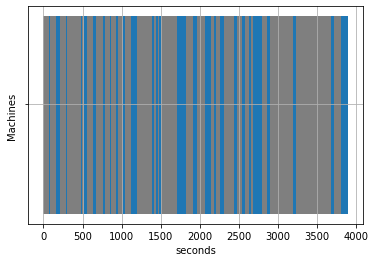

In [ ]:
instance = smsp_ri.riwiCi_Instance.generate_random(50,Wmax=10,Pmin=1, Pmax=50,Alpha=100)
solution = smsp_ri.Metaheuristics.iterative_LS(instance,Nb_iter=10)
print(solution.best_solution)
solution.best_solution.plot()

In [ ]:
instance = smsp_ri.riwiCi_Instance.generate_random(50,Wmax=10,Pmin=1, Pmax=50)
csp_solve_result = smsp_ri.ExactSolvers.csp(instance, **{"log_path": "csp_log.txt" ,"time_limit": 10})
print(csp_solve_result)

Logging to file: csp_log.txt
Number of characters 0
Search stopped with status : FEASIBLE
 Solution is : 
 Cmax : 93591
Job_schedule (job_id , start_time , completion_time) | Completion_time
(0, 1, 2) : (43, 3, 5) : (36, 5, 8) : (49, 8, 13) : (17, 13, 18) : (30, 18, 24) : (21, 24, 36) : (39, 36, 44) : (14, 44, 55) : (35, 55, 65) : (8, 65, 76) : (3, 76, 92) : (42, 92, 105) : (25, 105, 127) : (47, 127, 154) : (10, 154, 169) : (33, 169, 199) : (9, 199, 209) : (34, 209, 233) : (5, 233, 248) : (2, 248, 260) : (26, 260, 289) : (27, 289, 314) : (37, 314, 352) : (45, 352, 370) : (12, 370, 412) : (40, 412, 445) : (31, 445, 488) : (18, 488, 528) : (23, 528, 533) : (48, 533, 580) : (15, 580, 617) : (44, 617, 655) : (29, 655, 688) : (13, 688, 699) : (24, 699, 716) : (11, 716, 757) : (22, 757, 805) : (32, 805, 835) : (16, 835, 883) : (20, 883, 908) : (7, 908, 933) : (38, 933, 981) : (19, 981, 1015) : (28, 1015, 1050) : (46, 1050, 1086) : (41, 1086, 1122) : (4, 1122, 1164) : (6, 1164, 1188) : (1, 11

In [ ]:
instance = smsp.wiCi_Instance.generate_random(20,Wmax=10)
csp_solve_result = smsp.ExactSolvers.csp(instance, **{"time_limit": 30})
print(csp_solve_result)

Search stopped with status : FEASIBLE
 Solution is : 
 Cmax : 37325
Job_schedule (job_id , start_time , completion_time) | Completion_time
(12, 0, 17) : (14, 17, 22) : (17, 22, 47) : (13, 47, 69) : (9, 69, 95) : (8, 95, 141) : (1, 141, 193) : (0, 193, 240) : (7, 240, 279) : (18, 279, 358) : (15, 358, 449) : (4, 449, 532) : (5, 532, 574) : (10, 574, 648) : (19, 648, 708) : (11, 708, 785) : (2, 785, 832) : (6, 832, 849) : (3, 849, 897) : (16, 897, 959) | 37325 
Runtime is : 30s 
time to best is : 0.01s 



In [ ]:
solution = smsp.Heuristics.WSPT(instance)
print(solution)

Search stopped with status : OPTIMAL
 Solution is : 
 Cmax : 37325
Job_schedule (job_id , start_time , completion_time) | Completion_time
(12, 0, 17) : (14, 17, 22) : (17, 22, 47) : (13, 47, 69) : (9, 69, 95) : (8, 95, 141) : (1, 141, 193) : (0, 193, 240) : (7, 240, 279) : (18, 279, 358) : (15, 358, 449) : (4, 449, 532) : (5, 532, 574) : (10, 574, 648) : (19, 648, 708) : (11, 708, 785) : (2, 785, 832) : (6, 832, 849) : (3, 849, 897) : (16, 897, 959) | 37325 
Runtime is : 5.3800991736352444e-05s 
time to best is : -1s 



In [ ]:
instance = smsp_T.wiTi_Instance.generate_random(5,Wmax=10)
instance.to_txt("DeleteMe.txt")
solution = smsp_T.Heuristics.WSPT(instance).best_solution
print(solution)
solution = smsp_T.Heuristics.MS(instance).best_solution
print(solution)
solution = smsp_T.Heuristics.ACT(instance).best_solution
print(solution)

Objective : 52
Job_schedule (job_id , start_time , completion_time) | objective
(2, 0, 3) : (1, 3, 6) : (3, 6, 12) : (4, 12, 23) : (0, 23, 31) | 52
Objective : 106
Job_schedule (job_id , start_time , completion_time) | objective
(3, 0, 6) : (0, 6, 14) : (2, 14, 17) : (1, 17, 20) : (4, 20, 31) | 106
Objective : 31
Job_schedule (job_id , start_time , completion_time) | objective
(2, 0, 3) : (3, 3, 9) : (1, 9, 12) : (4, 12, 23) : (0, 23, 31) | 31


In [ ]:
instance = smsp_riT.riwiTi_Instance.generate_random(20,Wmax=10)
instance.to_txt("DeleteMe.txt")

In [ ]:
instance = smsp_riT.riwiTi_Instance.generate_random(20,Wmax=6)
csp_solve_result = smsp_ri.ExactSolvers.csp(instance, **{"time_limit": 30, "objective": "wiTi"})
print(csp_solve_result)

Search stopped with status : FEASIBLE
 Solution is : 
 Cmax : 889
Job_schedule (job_id , start_time , completion_time) | Completion_time
(8, 0, 2) : (10, 2, 5) : (1, 5, 6) : (9, 6, 8) : (0, 8, 12) : (7, 12, 15) : (17, 15, 17) : (19, 17, 22) : (6, 22, 27) : (14, 27, 35) : (13, 35, 43) : (3, 43, 47) : (12, 47, 51) : (4, 51, 58) : (2, 58, 65) : (11, 65, 70) : (16, 70, 74) : (15, 74, 80) : (18, 80, 87) : (5, 87, 95) | 889 
Runtime is : 30s 
time to best is : 0.05s 



In [ ]:
solve_result = smsp_riT.Heuristics.ACT_WSECi(instance)
print(solve_result)

Search stopped with status : FEASIBLE
 Solution is : 
 Cmax : 963
Job_schedule (job_id , start_time , completion_time) | Completion_time
(9, 1, 3) : (1, 3, 4) : (10, 4, 7) : (17, 7, 9) : (0, 9, 13) : (8, 13, 15) : (6, 15, 20) : (7, 20, 23) : (19, 23, 28) : (14, 28, 36) : (13, 36, 44) : (3, 44, 48) : (12, 48, 52) : (4, 52, 59) : (2, 59, 66) : (11, 66, 71) : (16, 71, 75) : (15, 75, 81) : (18, 81, 88) : (5, 88, 96) | 963 
Runtime is : 0.00038706499617546797s 
time to best is : -1s 



In [ ]:
instance = smsp_risT.risijwiTi_Instance.read_txt("deleteMe.txt")
solution = smsp_risT.Heuristics.ACTS_WSECi(instance)
print(solution)

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 402
Job_schedule (job_id , start_time , completion_time) | objective
(3, 33, 39) : (2, 42, 57) : (1, 57, 135) : (5, 135, 281) : (0, 281, 378) : (4, 378, 450) : (6, 450, 527) | 402 
Runtime is : 0.0001990000018849969s 
time to best is : -1s 



In [32]:
import pyscheduling_cc.SMSP.interface as sm 

problem = sm.Problem()
problem.add_constraints([sm.Constraints.W,sm.Constraints.D])
problem.set_objective(sm.Objective.wiTi)
problem.generate_random(jobs_number=20,Wmax=10)
solution = problem.solve(problem.heuristics["ACT"])
print(solution)

Search stopped with status : FEASIBLE
 Solution is : 
 Objective : 1987
Job_schedule (job_id , start_time , completion_time) | objective
(18, 0, 6) : (7, 6, 13) : (5, 13, 24) : (16, 24, 34) : (9, 34, 49) : (3, 49, 56) : (11, 56, 66) : (10, 66, 78) : (1, 78, 91) : (15, 91, 100) : (2, 100, 114) : (0, 114, 126) : (14, 126, 132) : (17, 132, 138) : (13, 138, 142) : (12, 142, 154) : (4, 154, 162) : (19, 162, 176) : (8, 176, 193) : (6, 193, 204) | 1987 
Runtime is : 0.000314799999614479s 
time to best is : -1s 



In [26]:

problem = sm.Problem()

problem.add_constraints([sm.Constraints.W])
problem.set_objective(sm.Objective.wiCi)
problem.read_txt("deleteMe.txt")
solution = problem.solve(problem.heuristics["WSPT"])
print(solution)

Search stopped with status : OPTIMAL
 Solution is : 
 Objective : 10307
Job_schedule (job_id , start_time , completion_time) | objective
(16, 0, 3) : (12, 3, 11) : (14, 11, 18) : (11, 18, 32) : (13, 32, 47) : (5, 47, 56) : (6, 56, 87) : (8, 87, 115) : (10, 115, 122) : (17, 122, 137) : (0, 137, 174) : (19, 174, 187) : (15, 187, 207) : (4, 207, 218) : (7, 218, 229) : (18, 229, 255) : (3, 255, 299) : (2, 299, 313) : (1, 313, 336) : (9, 336, 363) | 10307 
Runtime is : 8.839999998144776e-05s 
time to best is : -1s 



In [46]:
import pyscheduling_cc.benchmark as benchmark

problem = sm.Problem()
problem.add_constraints([sm.Constraints.W,sm.Constraints.D])
problem.set_objective(sm.Objective.wiTi)
problem.generate_random(jobs_number=20,Wmax=10,InstanceName="testInstance1")
instance1 = problem.instance
problem.generate_random(jobs_number=20,Wmax=10,InstanceName="testInstance2")
instance2 = problem.instance
benchmark.run_solver_instance([instance1,instance2],problem.heuristics.values())

[{'ACT_objective': 9609,
  'ACT_runtime': 0.00020229999972798396,
  'MS_objective': 22453,
  'MS_runtime': 9.470000077271834e-05,
  'WSPT_objective': 9637,
  'WSPT_runtime': 4.439999975147657e-05},
 {'ACT_objective': 2443,
  'ACT_runtime': 0.00017250000018975697,
  'MS_objective': 7208,
  'MS_runtime': 8.469999920635018e-05,
  'WSPT_objective': 2568,
  'WSPT_runtime': 4.1500001316308044e-05}]